In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [14]:
def fun(x,y):
    return np.log10(np.abs(x))*5*np.cos(y)+(0.55*(x+y))

In [15]:
x = np.outer(np.linspace(-10, 10, 100), np.ones(100))
y = x.copy().T
z = fun(x,y)

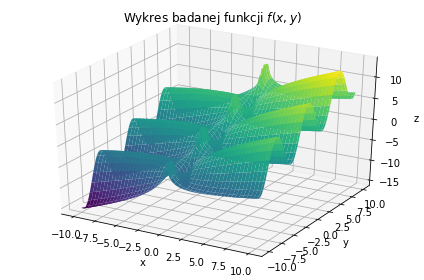

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Wykres badanej funkcji $f(x,y)$")
plt.tight_layout()
plt.show()

In [17]:
X = np.column_stack((x.flatten(), y.flatten()))
y = z.flatten()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=85)

In [19]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [20]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:,None])[:,0]
y_test = y_scaler.transform(y_test[:,None])[:,0]

[[   0 1000]
 [   0 1000]
 [   0 1000]]
 The best solution found:
 [962.76479969   1.91885522   4.15766589]

 Objective function:
 0.7709843530809098


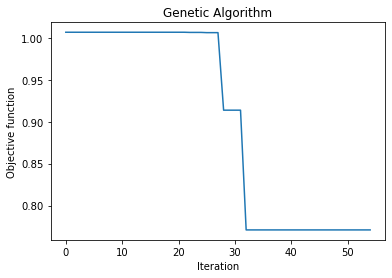

In [39]:
from genetic_selection import GeneticSelectionCV
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=5,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
    selector = selector.fit(X, y)



In [21]:
algorithm_param = {'max_num_iteration': 2000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv': 20,
                   'function_timeout ': 60.0}

In [25]:


def RBF(X):
    model = svm.SVR(kernel='rbf',C=X[0], epsilon=X[1], gamma=X[2])
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print( model.score(y_train, y_pred_train))
    return model.score(y_train, y_pred_train).reshape(-1,1)

varbound=np.array([[0,1000]]*3)

model=ga(function=RBF,dimension=3,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.86362941  1.35987601  1.04224799 ... -0.74692265  0.31340036
  0.08554991].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

 The best solution found:
 [722.0741278   36.16916839]

 Objective function:
 1.0186020246578855


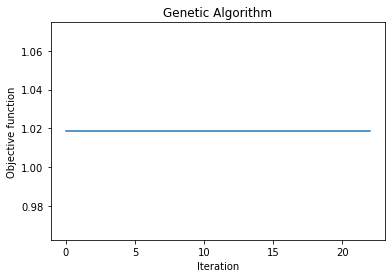

In [32]:
def linear(X):
    model = svm.SVR(kernel='linear',C=X[0], epsilon=X[1])
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    return metrics.mean_squared_error(y_train, y_pred_train)

varbound=np.array([[0,1000]]*2)
model=ga(function=linear,dimension=2,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

In [35]:
### problem with delays
def poly(X):
    model = svm.SVR(kernel='poly',C=X[0], epsilon=X[1],coef0=X[2],degree=X[3])
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    return metrics.mean_squared_error(y_train, y_pred_train)

varbound=np.array([[0,1000],[0,100],[0,100], [2,6]])
vartype=np.array([['real'],['real'],['real'], ['int']])
model=ga(function=poly,dimension=4,variable_type_mixed=vartype,variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

__________________________________________________ 0.9% GA is running...given function is not applicable


AssertionError: After 10.0 seconds delay func_timeout: the given function does not provide any output

In [ ]:
def sigmoid(X):
    model = svm.SVR(kernel='sigmoid',C=X[0], epsilon=X[1],coef0=X[2])
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    return metrics.mean_squared_error(y_train, y_pred_train)

varbound=np.array([[0,1000],[0,100],[0,100]])
vartype=np.array([['real'],['real'],['real']])
model=ga(function=sigmoid,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()